In [1]:
%matplotlib notebook 
from sklearn.model_selection import train_test_split
import torch.nn as nn

from Constants import LABEL_POSITIVE_COLOR, LABEL_NEGATIVE_COLOR
from Data import save_dataset, get_dataset
from Evaluate import calculate_metrics
from GNN.GNNModel import GNNModel
from GNN.InitialDataLayer import InitialDataLayer
from GNN.ConcatNets import ConcatNets
from GNN.NetLinear import NetLinear
from GNN.NetFirstGraphConvThenLinear import NetFirstGraphConvThenLinear
from GNN.NetFirstLinearThenGraphConv import NetFirstLinearThenGraphConv
from PlotMPL import plot_from_file, plot_predicted, use_new_window
from Preprocess import is_labeled_positive


Using backend: pytorch


In [2]:
limit = 500
dataset, dataset_filenames, word_to_ixs, standardize = get_dataset(limit=limit)

train_d, test_d, train_f, test_f = train_test_split(dataset, dataset_filenames, test_size=0.17)
del dataset, dataset_filenames

Dataset loaded in 1.4s


In [7]:
net = nn.Sequential(
        InitialDataLayer(word_to_ixs=word_to_ixs),
        NetFirstGraphConvThenLinear(hidden_conv_sizes=[32], hidden_linear_sizes=[128, 128, 64, 64, 32, 16], dropout_p=0.5)
    )
first_model = GNNModel(net)

Sequential(
  (0): InitialDataLayer(
    (dropout): Dropout(p=0.4, inplace=False)
    (edge_layer): EdgeLayer(
      (linear): Linear(in_features=4, out_features=8, bias=True)
    )
    (node_layer): NodeEmbeddingLayer(
      (col_to_embedding): ModuleDict(
        (2): Embedding(5, 5)
        (3): Embedding(83, 5)
        (4): Embedding(20, 5)
        (44): Embedding(31, 5)
        (45): Embedding(8, 5)
        (5): Embedding(21, 5)
        (6): Embedding(21, 5)
      )
      (linear): Linear(in_features=85, out_features=64, bias=True)
    )
  )
  (1): NetFirstGraphConvThenLinear(
    (dropout): Dropout(p=0.5, inplace=False)
    (hidden_conv_net): NetGraphConv(
      (dropout): Dropout(p=0.4, inplace=False)
      (hidden_conv_layers): ModuleList(
        (0): GraphConv(in=72, out=32, normalization=both, activation=None)
      )
      (last_linear_layer): Linear(in_features=32, out_features=32, bias=True)
    )
    (hidden_linear_net): NetLinear(
      (dropout): Dropout(p=0.4, inplace

In [8]:
first_model.train(train_d, loss_weights=[1.0, 8.6], batch_size=5, epochs=30)

Epoch 00000 | Step 00000 | Loss 0.7400 | Acc 0.0823 |
Epoch 00000 | Step 00001 | Loss 31.2068 | Acc 0.9151 |
Epoch 00000 | Step 00002 | Loss 0.8293 | Acc 0.0247 |
Epoch 00000 | Step 00003 | Loss 0.6905 | Acc 0.1329 |
Epoch 00000 | Step 00004 | Loss 0.6884 | Acc 0.1303 |
Epoch 00000 | Step 00005 | Loss 0.8153 | Acc 0.0216 |
Epoch 00000 | Step 00006 | Loss 0.6527 | Acc 0.9850 |
Epoch 00000 | Step 00007 | Loss 0.6077 | Acc 0.9786 |
Epoch 00000 | Step 00008 | Loss 0.8129 | Acc 0.7459 |
Epoch 00000 | Step 00009 | Loss 0.7510 | Acc 0.7893 |
Epoch 00000 | Step 00010 | Loss 0.6538 | Acc 0.9680 |
Epoch 00000 | Step 00011 | Loss 0.7479 | Acc 0.7909 |
Epoch 00000 | Step 00012 | Loss 0.6364 | Acc 0.9872 |
Epoch 00000 | Step 00013 | Loss 0.7431 | Acc 0.8242 |
Epoch 00000 | Step 00014 | Loss 0.7111 | Acc 0.8692 |
Epoch 00000 | Step 00015 | Loss 0.7141 | Acc 0.8467 |
Epoch 00000 | Step 00016 | Loss 0.6766 | Acc 0.9438 |
Epoch 00000 | Step 00017 | Loss 0.7179 | Acc 0.8300 |
Epoch 00000 | Step 00018 | 

Epoch 00001 | Step 00074 | Loss 0.6761 | Acc 0.7756 |
Epoch 00001 | Step 00075 | Loss 0.6913 | Acc 0.7076 |
Epoch 00001 | Step 00076 | Loss 0.6751 | Acc 0.8841 |
Epoch 00001 | Step 00077 | Loss 0.6781 | Acc 0.8920 |
Epoch 00001 | Step 00078 | Loss 0.7090 | Acc 0.7753 |
Epoch 00001 | Step 00079 | Loss 0.6788 | Acc 0.8541 |
Epoch 00002 | Step 00000 | Loss 0.6689 | Acc 0.8721 |
Epoch 00002 | Step 00001 | Loss 0.6674 | Acc 0.8536 |
Epoch 00002 | Step 00002 | Loss 0.6592 | Acc 0.8818 |
Epoch 00002 | Step 00003 | Loss 0.6873 | Acc 0.8439 |
Epoch 00002 | Step 00004 | Loss 0.6683 | Acc 0.8103 |
Epoch 00002 | Step 00005 | Loss 0.6738 | Acc 0.8516 |
Epoch 00002 | Step 00006 | Loss 0.6228 | Acc 0.9448 |
Epoch 00002 | Step 00007 | Loss 0.6072 | Acc 0.9734 |
Epoch 00002 | Step 00008 | Loss 0.7763 | Acc 0.7478 |
Epoch 00002 | Step 00009 | Loss 0.7293 | Acc 0.7920 |
Epoch 00002 | Step 00010 | Loss 0.6416 | Acc 0.9128 |
Epoch 00002 | Step 00011 | Loss 0.7144 | Acc 0.7803 |
Epoch 00002 | Step 00012 | L

Epoch 00003 | Step 00066 | Loss 0.5736 | Acc 0.6668 |
Epoch 00003 | Step 00067 | Loss 0.7041 | Acc 0.6204 |
Epoch 00003 | Step 00068 | Loss 0.6181 | Acc 0.7449 |
Epoch 00003 | Step 00069 | Loss 0.6174 | Acc 0.7278 |
Epoch 00003 | Step 00070 | Loss 0.6499 | Acc 0.6695 |
Epoch 00003 | Step 00071 | Loss 0.5817 | Acc 0.7066 |
Epoch 00003 | Step 00072 | Loss 0.6014 | Acc 0.8025 |
Epoch 00003 | Step 00073 | Loss 0.6499 | Acc 0.7772 |
Epoch 00003 | Step 00074 | Loss 0.6091 | Acc 0.7414 |
Epoch 00003 | Step 00075 | Loss 0.6214 | Acc 0.6603 |
Epoch 00003 | Step 00076 | Loss 0.6551 | Acc 0.6937 |
Epoch 00003 | Step 00077 | Loss 0.6486 | Acc 0.7574 |
Epoch 00003 | Step 00078 | Loss 0.6384 | Acc 0.7556 |
Epoch 00003 | Step 00079 | Loss 0.6523 | Acc 0.6985 |
Epoch 00004 | Step 00000 | Loss 0.5836 | Acc 0.7631 |
Epoch 00004 | Step 00001 | Loss 0.5854 | Acc 0.7776 |
Epoch 00004 | Step 00002 | Loss 0.5967 | Acc 0.7911 |
Epoch 00004 | Step 00003 | Loss 0.6441 | Acc 0.7766 |
Epoch 00004 | Step 00004 | L

Epoch 00005 | Step 00058 | Loss 0.5261 | Acc 0.8618 |
Epoch 00005 | Step 00059 | Loss 0.6354 | Acc 0.7214 |
Epoch 00005 | Step 00060 | Loss 0.5705 | Acc 0.7589 |
Epoch 00005 | Step 00061 | Loss 0.5729 | Acc 0.6974 |
Epoch 00005 | Step 00062 | Loss 0.6017 | Acc 0.7413 |
Epoch 00005 | Step 00063 | Loss 0.6150 | Acc 0.7345 |
Epoch 00005 | Step 00064 | Loss 0.6098 | Acc 0.7322 |
Epoch 00005 | Step 00065 | Loss 0.5447 | Acc 0.7134 |
Epoch 00005 | Step 00066 | Loss 0.5378 | Acc 0.6683 |
Epoch 00005 | Step 00067 | Loss 0.6841 | Acc 0.6234 |
Epoch 00005 | Step 00068 | Loss 0.5835 | Acc 0.7326 |
Epoch 00005 | Step 00069 | Loss 0.5772 | Acc 0.7248 |
Epoch 00005 | Step 00070 | Loss 0.6220 | Acc 0.6811 |
Epoch 00005 | Step 00071 | Loss 0.5452 | Acc 0.7031 |
Epoch 00005 | Step 00072 | Loss 0.5505 | Acc 0.7994 |
Epoch 00005 | Step 00073 | Loss 0.6286 | Acc 0.7746 |
Epoch 00005 | Step 00074 | Loss 0.5739 | Acc 0.7247 |
Epoch 00005 | Step 00075 | Loss 0.5890 | Acc 0.6674 |
Epoch 00005 | Step 00076 | L

Epoch 00007 | Step 00050 | Loss 0.5346 | Acc 0.6886 |
Epoch 00007 | Step 00051 | Loss 0.6221 | Acc 0.6409 |
Epoch 00007 | Step 00052 | Loss 0.6173 | Acc 0.7244 |
Epoch 00007 | Step 00053 | Loss 0.5590 | Acc 0.7503 |
Epoch 00007 | Step 00054 | Loss 0.5630 | Acc 0.6971 |
Epoch 00007 | Step 00055 | Loss 0.5795 | Acc 0.7226 |
Epoch 00007 | Step 00056 | Loss 0.5302 | Acc 0.7883 |
Epoch 00007 | Step 00057 | Loss 0.6010 | Acc 0.8305 |
Epoch 00007 | Step 00058 | Loss 0.5045 | Acc 0.8254 |
Epoch 00007 | Step 00059 | Loss 0.6129 | Acc 0.7258 |
Epoch 00007 | Step 00060 | Loss 0.5530 | Acc 0.7567 |
Epoch 00007 | Step 00061 | Loss 0.5553 | Acc 0.7010 |
Epoch 00007 | Step 00062 | Loss 0.5894 | Acc 0.7384 |
Epoch 00007 | Step 00063 | Loss 0.5899 | Acc 0.7436 |
Epoch 00007 | Step 00064 | Loss 0.6021 | Acc 0.7267 |
Epoch 00007 | Step 00065 | Loss 0.5355 | Acc 0.7231 |
Epoch 00007 | Step 00066 | Loss 0.5275 | Acc 0.6682 |
Epoch 00007 | Step 00067 | Loss 0.6439 | Acc 0.6306 |
Epoch 00007 | Step 00068 | L

Epoch 00009 | Step 00043 | Loss 0.5546 | Acc 0.7252 |
Epoch 00009 | Step 00044 | Loss 0.5381 | Acc 0.6997 |
Epoch 00009 | Step 00045 | Loss 0.5638 | Acc 0.7810 |
Epoch 00009 | Step 00046 | Loss 0.5795 | Acc 0.7084 |
Epoch 00009 | Step 00047 | Loss 0.6282 | Acc 0.6830 |
Epoch 00009 | Step 00048 | Loss 0.5581 | Acc 0.6746 |
Epoch 00009 | Step 00049 | Loss 0.5428 | Acc 0.6074 |
Epoch 00009 | Step 00050 | Loss 0.5256 | Acc 0.6976 |
Epoch 00009 | Step 00051 | Loss 0.6065 | Acc 0.6516 |
Epoch 00009 | Step 00052 | Loss 0.6122 | Acc 0.7205 |
Epoch 00009 | Step 00053 | Loss 0.5437 | Acc 0.7454 |
Epoch 00009 | Step 00054 | Loss 0.5568 | Acc 0.6955 |
Epoch 00009 | Step 00055 | Loss 0.5702 | Acc 0.7155 |
Epoch 00009 | Step 00056 | Loss 0.5115 | Acc 0.7940 |
Epoch 00009 | Step 00057 | Loss 0.5929 | Acc 0.8251 |
Epoch 00009 | Step 00058 | Loss 0.4846 | Acc 0.8143 |
Epoch 00009 | Step 00059 | Loss 0.6109 | Acc 0.7177 |
Epoch 00009 | Step 00060 | Loss 0.5473 | Acc 0.7720 |
Epoch 00009 | Step 00061 | L

Epoch 00011 | Step 00035 | Loss 0.5375 | Acc 0.7812 |
Epoch 00011 | Step 00036 | Loss 0.5227 | Acc 0.7500 |
Epoch 00011 | Step 00037 | Loss 0.5394 | Acc 0.6997 |
Epoch 00011 | Step 00038 | Loss 0.5603 | Acc 0.6675 |
Epoch 00011 | Step 00039 | Loss 0.5061 | Acc 0.7532 |
Epoch 00011 | Step 00040 | Loss 0.5318 | Acc 0.7905 |
Epoch 00011 | Step 00041 | Loss 0.5363 | Acc 0.7876 |
Epoch 00011 | Step 00042 | Loss 0.6153 | Acc 0.6587 |
Epoch 00011 | Step 00043 | Loss 0.5517 | Acc 0.7253 |
Epoch 00011 | Step 00044 | Loss 0.5315 | Acc 0.7093 |
Epoch 00011 | Step 00045 | Loss 0.5535 | Acc 0.7853 |
Epoch 00011 | Step 00046 | Loss 0.5716 | Acc 0.7130 |
Epoch 00011 | Step 00047 | Loss 0.6217 | Acc 0.6815 |
Epoch 00011 | Step 00048 | Loss 0.5536 | Acc 0.6785 |
Epoch 00011 | Step 00049 | Loss 0.5404 | Acc 0.6170 |
Epoch 00011 | Step 00050 | Loss 0.5188 | Acc 0.6951 |
Epoch 00011 | Step 00051 | Loss 0.5971 | Acc 0.6567 |
Epoch 00011 | Step 00052 | Loss 0.6003 | Acc 0.7336 |
Epoch 00011 | Step 00053 | L

Epoch 00013 | Step 00030 | Loss 0.5235 | Acc 0.6356 |
Epoch 00013 | Step 00031 | Loss 0.6191 | Acc 0.6978 |
Epoch 00013 | Step 00032 | Loss 0.5397 | Acc 0.7668 |
Epoch 00013 | Step 00033 | Loss 0.5739 | Acc 0.7741 |
Epoch 00013 | Step 00034 | Loss 0.5706 | Acc 0.7548 |
Epoch 00013 | Step 00035 | Loss 0.5349 | Acc 0.7892 |
Epoch 00013 | Step 00036 | Loss 0.5165 | Acc 0.7551 |
Epoch 00013 | Step 00037 | Loss 0.5407 | Acc 0.7091 |
Epoch 00013 | Step 00038 | Loss 0.5595 | Acc 0.6809 |
Epoch 00013 | Step 00039 | Loss 0.4986 | Acc 0.7563 |
Epoch 00013 | Step 00040 | Loss 0.5274 | Acc 0.7938 |
Epoch 00013 | Step 00041 | Loss 0.5294 | Acc 0.7889 |
Epoch 00013 | Step 00042 | Loss 0.5962 | Acc 0.6756 |
Epoch 00013 | Step 00043 | Loss 0.5429 | Acc 0.7310 |
Epoch 00013 | Step 00044 | Loss 0.5297 | Acc 0.7016 |
Epoch 00013 | Step 00045 | Loss 0.5486 | Acc 0.7823 |
Epoch 00013 | Step 00046 | Loss 0.5617 | Acc 0.7057 |
Epoch 00013 | Step 00047 | Loss 0.6213 | Acc 0.6817 |
Epoch 00013 | Step 00048 | L

Epoch 00015 | Step 00022 | Loss 0.6208 | Acc 0.7698 |
Epoch 00015 | Step 00023 | Loss 0.5463 | Acc 0.7643 |
Epoch 00015 | Step 00024 | Loss 0.5129 | Acc 0.8000 |
Epoch 00015 | Step 00025 | Loss 0.5352 | Acc 0.7425 |
Epoch 00015 | Step 00026 | Loss 0.5921 | Acc 0.6853 |
Epoch 00015 | Step 00027 | Loss 0.5305 | Acc 0.7229 |
Epoch 00015 | Step 00028 | Loss 0.5235 | Acc 0.7029 |
Epoch 00015 | Step 00029 | Loss 0.4899 | Acc 0.6814 |
Epoch 00015 | Step 00030 | Loss 0.5213 | Acc 0.6270 |
Epoch 00015 | Step 00031 | Loss 0.6104 | Acc 0.7062 |
Epoch 00015 | Step 00032 | Loss 0.5362 | Acc 0.7667 |
Epoch 00015 | Step 00033 | Loss 0.5641 | Acc 0.7772 |
Epoch 00015 | Step 00034 | Loss 0.5637 | Acc 0.7579 |
Epoch 00015 | Step 00035 | Loss 0.5229 | Acc 0.7880 |
Epoch 00015 | Step 00036 | Loss 0.5106 | Acc 0.7558 |
Epoch 00015 | Step 00037 | Loss 0.5348 | Acc 0.7080 |
Epoch 00015 | Step 00038 | Loss 0.5556 | Acc 0.6659 |
Epoch 00015 | Step 00039 | Loss 0.4883 | Acc 0.7713 |
Epoch 00015 | Step 00040 | L

Epoch 00017 | Step 00015 | Loss 0.5595 | Acc 0.6534 |
Epoch 00017 | Step 00016 | Loss 0.5734 | Acc 0.7459 |
Epoch 00017 | Step 00017 | Loss 0.5404 | Acc 0.7142 |
Epoch 00017 | Step 00018 | Loss 0.4921 | Acc 0.7319 |
Epoch 00017 | Step 00019 | Loss 0.4722 | Acc 0.8148 |
Epoch 00017 | Step 00020 | Loss 0.5370 | Acc 0.8173 |
Epoch 00017 | Step 00021 | Loss 0.5658 | Acc 0.7978 |
Epoch 00017 | Step 00022 | Loss 0.6223 | Acc 0.7688 |
Epoch 00017 | Step 00023 | Loss 0.5382 | Acc 0.7655 |
Epoch 00017 | Step 00024 | Loss 0.5130 | Acc 0.8061 |
Epoch 00017 | Step 00025 | Loss 0.5336 | Acc 0.7248 |
Epoch 00017 | Step 00026 | Loss 0.5906 | Acc 0.6559 |
Epoch 00017 | Step 00027 | Loss 0.5274 | Acc 0.7330 |
Epoch 00017 | Step 00028 | Loss 0.5211 | Acc 0.7126 |
Epoch 00017 | Step 00029 | Loss 0.4871 | Acc 0.6909 |
Epoch 00017 | Step 00030 | Loss 0.5211 | Acc 0.6382 |
Epoch 00017 | Step 00031 | Loss 0.6030 | Acc 0.7124 |
Epoch 00017 | Step 00032 | Loss 0.5415 | Acc 0.7569 |
Epoch 00017 | Step 00033 | L

Epoch 00019 | Step 00009 | Loss 0.5619 | Acc 0.7429 |
Epoch 00019 | Step 00010 | Loss 0.5461 | Acc 0.7439 |
Epoch 00019 | Step 00011 | Loss 0.5503 | Acc 0.6991 |
Epoch 00019 | Step 00012 | Loss 0.4528 | Acc 0.7995 |
Epoch 00019 | Step 00013 | Loss 0.5333 | Acc 0.6822 |
Epoch 00019 | Step 00014 | Loss 0.5192 | Acc 0.7626 |
Epoch 00019 | Step 00015 | Loss 0.5572 | Acc 0.6489 |
Epoch 00019 | Step 00016 | Loss 0.5778 | Acc 0.7456 |
Epoch 00019 | Step 00017 | Loss 0.5353 | Acc 0.7263 |
Epoch 00019 | Step 00018 | Loss 0.4872 | Acc 0.7310 |
Epoch 00019 | Step 00019 | Loss 0.4692 | Acc 0.8162 |
Epoch 00019 | Step 00020 | Loss 0.5321 | Acc 0.8202 |
Epoch 00019 | Step 00021 | Loss 0.5638 | Acc 0.8077 |
Epoch 00019 | Step 00022 | Loss 0.6292 | Acc 0.7774 |
Epoch 00019 | Step 00023 | Loss 0.5393 | Acc 0.7769 |
Epoch 00019 | Step 00024 | Loss 0.5014 | Acc 0.8044 |
Epoch 00019 | Step 00025 | Loss 0.5313 | Acc 0.7425 |
Epoch 00019 | Step 00026 | Loss 0.5894 | Acc 0.6884 |
Epoch 00019 | Step 00027 | L

Epoch 00021 | Step 00001 | Loss 0.4787 | Acc 0.7824 |
Epoch 00021 | Step 00002 | Loss 0.4880 | Acc 0.8011 |
Epoch 00021 | Step 00003 | Loss 0.5825 | Acc 0.7211 |
Epoch 00021 | Step 00004 | Loss 0.5398 | Acc 0.6801 |
Epoch 00021 | Step 00005 | Loss 0.4703 | Acc 0.8011 |
Epoch 00021 | Step 00006 | Loss 0.5527 | Acc 0.7357 |
Epoch 00021 | Step 00007 | Loss 0.4047 | Acc 0.9076 |
Epoch 00021 | Step 00008 | Loss 0.7252 | Acc 0.7479 |
Epoch 00021 | Step 00009 | Loss 0.5553 | Acc 0.7494 |
Epoch 00021 | Step 00010 | Loss 0.5493 | Acc 0.7488 |
Epoch 00021 | Step 00011 | Loss 0.5427 | Acc 0.7011 |
Epoch 00021 | Step 00012 | Loss 0.4553 | Acc 0.7979 |
Epoch 00021 | Step 00013 | Loss 0.5340 | Acc 0.6832 |
Epoch 00021 | Step 00014 | Loss 0.5184 | Acc 0.7552 |
Epoch 00021 | Step 00015 | Loss 0.5610 | Acc 0.6497 |
Epoch 00021 | Step 00016 | Loss 0.5640 | Acc 0.7527 |
Epoch 00021 | Step 00017 | Loss 0.5298 | Acc 0.7298 |
Epoch 00021 | Step 00018 | Loss 0.4824 | Acc 0.7447 |
Epoch 00021 | Step 00019 | L

Epoch 00022 | Step 00075 | Loss 0.5593 | Acc 0.7073 |
Epoch 00022 | Step 00076 | Loss 0.5891 | Acc 0.6981 |
Epoch 00022 | Step 00077 | Loss 0.5712 | Acc 0.7493 |
Epoch 00022 | Step 00078 | Loss 0.5230 | Acc 0.7240 |
Epoch 00022 | Step 00079 | Loss 0.5979 | Acc 0.7291 |
Epoch 00023 | Step 00000 | Loss 0.4806 | Acc 0.7457 |
Epoch 00023 | Step 00001 | Loss 0.4783 | Acc 0.7824 |
Epoch 00023 | Step 00002 | Loss 0.4859 | Acc 0.8020 |
Epoch 00023 | Step 00003 | Loss 0.5678 | Acc 0.7028 |
Epoch 00023 | Step 00004 | Loss 0.5343 | Acc 0.7065 |
Epoch 00023 | Step 00005 | Loss 0.4714 | Acc 0.8001 |
Epoch 00023 | Step 00006 | Loss 0.5504 | Acc 0.7414 |
Epoch 00023 | Step 00007 | Loss 0.4051 | Acc 0.9003 |
Epoch 00023 | Step 00008 | Loss 0.7155 | Acc 0.7480 |
Epoch 00023 | Step 00009 | Loss 0.5551 | Acc 0.7507 |
Epoch 00023 | Step 00010 | Loss 0.5457 | Acc 0.7453 |
Epoch 00023 | Step 00011 | Loss 0.5381 | Acc 0.7163 |
Epoch 00023 | Step 00012 | Loss 0.4527 | Acc 0.7973 |
Epoch 00023 | Step 00013 | L

Epoch 00024 | Step 00069 | Loss 0.5187 | Acc 0.7212 |
Epoch 00024 | Step 00070 | Loss 0.5504 | Acc 0.7057 |
Epoch 00024 | Step 00071 | Loss 0.5116 | Acc 0.6999 |
Epoch 00024 | Step 00072 | Loss 0.4718 | Acc 0.8105 |
Epoch 00024 | Step 00073 | Loss 0.5476 | Acc 0.7544 |
Epoch 00024 | Step 00074 | Loss 0.5116 | Acc 0.7220 |
Epoch 00024 | Step 00075 | Loss 0.5597 | Acc 0.7043 |
Epoch 00024 | Step 00076 | Loss 0.5837 | Acc 0.6949 |
Epoch 00024 | Step 00077 | Loss 0.5680 | Acc 0.7563 |
Epoch 00024 | Step 00078 | Loss 0.5205 | Acc 0.7369 |
Epoch 00024 | Step 00079 | Loss 0.6031 | Acc 0.7361 |
Epoch 00025 | Step 00000 | Loss 0.4770 | Acc 0.7587 |
Epoch 00025 | Step 00001 | Loss 0.4737 | Acc 0.7909 |
Epoch 00025 | Step 00002 | Loss 0.4855 | Acc 0.8039 |
Epoch 00025 | Step 00003 | Loss 0.5728 | Acc 0.7122 |
Epoch 00025 | Step 00004 | Loss 0.5362 | Acc 0.7110 |
Epoch 00025 | Step 00005 | Loss 0.4646 | Acc 0.8029 |
Epoch 00025 | Step 00006 | Loss 0.5591 | Acc 0.7291 |
Epoch 00025 | Step 00007 | L

Epoch 00026 | Step 00063 | Loss 0.5546 | Acc 0.7602 |
Epoch 00026 | Step 00064 | Loss 0.5437 | Acc 0.7182 |
Epoch 00026 | Step 00065 | Loss 0.5044 | Acc 0.7224 |
Epoch 00026 | Step 00066 | Loss 0.5060 | Acc 0.6842 |
Epoch 00026 | Step 00067 | Loss 0.5930 | Acc 0.6765 |
Epoch 00026 | Step 00068 | Loss 0.5402 | Acc 0.7334 |
Epoch 00026 | Step 00069 | Loss 0.5093 | Acc 0.7196 |
Epoch 00026 | Step 00070 | Loss 0.5465 | Acc 0.7103 |
Epoch 00026 | Step 00071 | Loss 0.5061 | Acc 0.7031 |
Epoch 00026 | Step 00072 | Loss 0.4709 | Acc 0.8102 |
Epoch 00026 | Step 00073 | Loss 0.5435 | Acc 0.7587 |
Epoch 00026 | Step 00074 | Loss 0.5149 | Acc 0.7301 |
Epoch 00026 | Step 00075 | Loss 0.5598 | Acc 0.7156 |
Epoch 00026 | Step 00076 | Loss 0.5828 | Acc 0.7004 |
Epoch 00026 | Step 00077 | Loss 0.5582 | Acc 0.7568 |
Epoch 00026 | Step 00078 | Loss 0.5221 | Acc 0.7309 |
Epoch 00026 | Step 00079 | Loss 0.6030 | Acc 0.7326 |
Epoch 00027 | Step 00000 | Loss 0.4745 | Acc 0.7536 |
Epoch 00027 | Step 00001 | L

Epoch 00028 | Step 00055 | Loss 0.5411 | Acc 0.7424 |
Epoch 00028 | Step 00056 | Loss 0.4819 | Acc 0.8105 |
Epoch 00028 | Step 00057 | Loss 0.5609 | Acc 0.8148 |
Epoch 00028 | Step 00058 | Loss 0.4685 | Acc 0.7940 |
Epoch 00028 | Step 00059 | Loss 0.5753 | Acc 0.7228 |
Epoch 00028 | Step 00060 | Loss 0.4969 | Acc 0.7742 |
Epoch 00028 | Step 00061 | Loss 0.5186 | Acc 0.7272 |
Epoch 00028 | Step 00062 | Loss 0.5316 | Acc 0.7243 |
Epoch 00028 | Step 00063 | Loss 0.5504 | Acc 0.7617 |
Epoch 00028 | Step 00064 | Loss 0.5469 | Acc 0.7180 |
Epoch 00028 | Step 00065 | Loss 0.4978 | Acc 0.7142 |
Epoch 00028 | Step 00066 | Loss 0.5053 | Acc 0.6846 |
Epoch 00028 | Step 00067 | Loss 0.5820 | Acc 0.6830 |
Epoch 00028 | Step 00068 | Loss 0.5449 | Acc 0.7291 |
Epoch 00028 | Step 00069 | Loss 0.5093 | Acc 0.7284 |
Epoch 00028 | Step 00070 | Loss 0.5508 | Acc 0.7042 |
Epoch 00028 | Step 00071 | Loss 0.5060 | Acc 0.7157 |
Epoch 00028 | Step 00072 | Loss 0.4659 | Acc 0.8114 |
Epoch 00028 | Step 00073 | L

Measures for GNNModel:
Confusion matrix:
[[442324 252155]
 [ 11920  98704]]
F1 score:
0.7230748018990347
Precision:
0.8786152197772991
Recall:
0.6719984896342456
RMSE:
0.5727141611360369
Optimal threshold: 
0.2576612


<IPython.core.display.Javascript object>


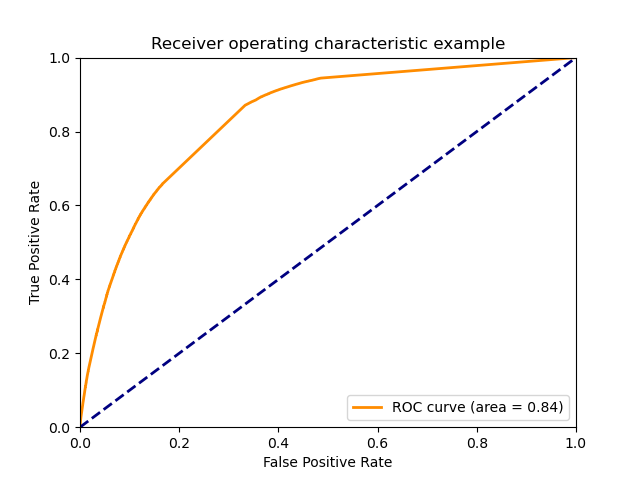

And now when predicted is from optimal threshold of only one node
Measures for GNNModel:
Confusion matrix:
[[463880 230599]
 [ 14327  96297]]
F1 score:
0.7429197602736696
Precision:
0.8772295442258661
Recall:
0.695783024035434
RMSE:
0.5515586786231961
Optimal threshold: 
0.2576612


<IPython.core.display.Javascript object>


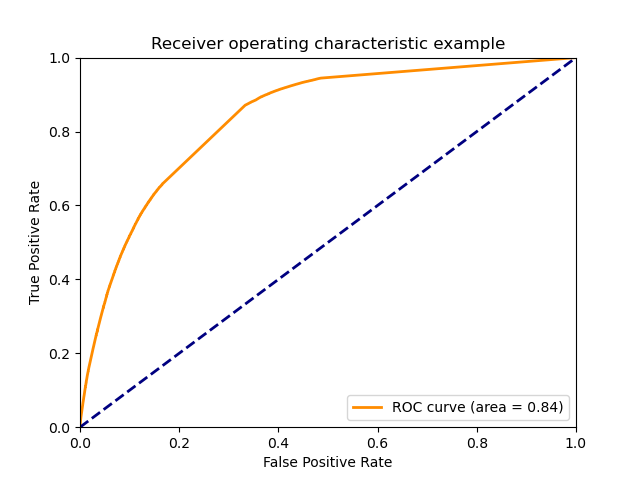

And now when predicted is from optimal threshold of only one node


(array([[463880, 230599],
        [ 14327,  96297]], dtype=int64),
 0.7429197602736696,
 0.8772295442258661,
 0.695783024035434,
 0.5515586786231961,
 0.2576612)

In [9]:
calculate_metrics(test_d, first_model, first_model.get_name())

<IPython.core.display.Javascript object>


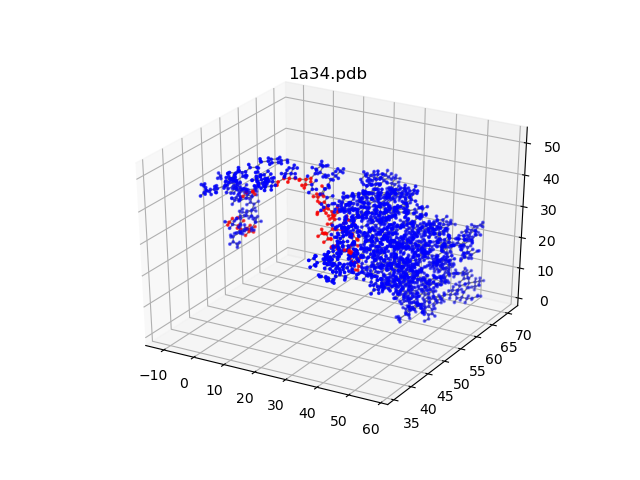

<IPython.core.display.Javascript object>


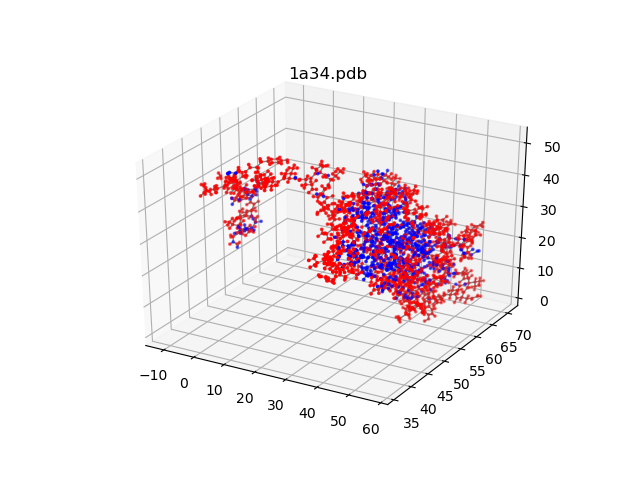

In [16]:
plot_from_file('1a34.pdb', lambda atom: LABEL_POSITIVE_COLOR if is_labeled_positive(atom) else LABEL_NEGATIVE_COLOR,
               word_to_ixs, standardize=standardize)
plot_predicted('1a34.pdb', first_model, word_to_ixs, standardize=standardize)

# Second model

Sequential(
  (0): InitialDataLayer(
    (dropout): Dropout(p=0.4, inplace=False)
    (edge_layer): EdgeLayer(
      (linear): Linear(in_features=4, out_features=8, bias=True)
    )
    (node_layer): NodeEmbeddingLayer(
      (col_to_embedding): ModuleDict(
        (2): Embedding(5, 5)
        (3): Embedding(83, 5)
        (4): Embedding(20, 5)
        (44): Embedding(31, 5)
        (45): Embedding(8, 5)
        (5): Embedding(21, 5)
        (6): Embedding(21, 5)
      )
      (linear): Linear(in_features=85, out_features=64, bias=True)
    )
  )
  (1): ConcatNets(
    (nets): ModuleList(
      (0): NetLinear(
        (dropout): Dropout(p=0.4, inplace=False)
        (hidden_linear_layers): ModuleList(
          (0): Linear(in_features=72, out_features=128, bias=True)
          (1): Linear(in_features=128, out_features=128, bias=True)
          (2): Linear(in_features=128, out_features=64, bias=True)
          (3): Linear(in_features=64, out_features=64, bias=True)
          (4): Linear

Epoch 00007 | Step 00003 | Loss 0.6903 | Acc 0.1335 |
Epoch 00007 | Step 00004 | Loss 0.6907 | Acc 0.1250 |
Epoch 00007 | Step 00005 | Loss 0.6947 | Acc 0.0976 |
Epoch 00007 | Step 00006 | Loss 0.6925 | Acc 0.1116 |
Epoch 00007 | Step 00007 | Loss 0.6917 | Acc 0.1168 |
Epoch 00007 | Step 00008 | Loss 0.6889 | Acc 0.1374 |
Epoch 00007 | Step 00009 | Loss 0.6953 | Acc 0.0967 |
Epoch 00007 | Step 00010 | Loss 0.6887 | Acc 0.1374 |
Epoch 00007 | Step 00011 | Loss 0.6917 | Acc 0.1156 |
Epoch 00007 | Step 00012 | Loss 0.6806 | Acc 0.1910 |
Epoch 00007 | Step 00013 | Loss 0.7174 | Acc 0.0449 |
Epoch 00008 | Step 00000 | Loss 0.6930 | Acc 0.1080 |
Epoch 00008 | Step 00001 | Loss 0.7011 | Acc 0.0665 |
Epoch 00008 | Step 00002 | Loss 0.6915 | Acc 0.1230 |
Epoch 00008 | Step 00003 | Loss 0.6903 | Acc 0.1335 |
Epoch 00008 | Step 00004 | Loss 0.6906 | Acc 0.1250 |
Epoch 00008 | Step 00005 | Loss 0.6948 | Acc 0.0976 |
Epoch 00008 | Step 00006 | Loss 0.6925 | Acc 0.1116 |
Epoch 00008 | Step 00007 | L

Epoch 00018 | Step 00001 | Loss 0.7010 | Acc 0.0665 |
Epoch 00018 | Step 00002 | Loss 0.6914 | Acc 0.1230 |
Epoch 00018 | Step 00003 | Loss 0.6900 | Acc 0.1335 |
Epoch 00018 | Step 00004 | Loss 0.6907 | Acc 0.1250 |
Epoch 00018 | Step 00005 | Loss 0.6947 | Acc 0.0976 |
Epoch 00018 | Step 00006 | Loss 0.6924 | Acc 0.1116 |
Epoch 00018 | Step 00007 | Loss 0.6917 | Acc 0.1168 |
Epoch 00018 | Step 00008 | Loss 0.6890 | Acc 0.1374 |
Epoch 00018 | Step 00009 | Loss 0.6951 | Acc 0.0967 |
Epoch 00018 | Step 00010 | Loss 0.6887 | Acc 0.1374 |
Epoch 00018 | Step 00011 | Loss 0.6917 | Acc 0.1156 |
Epoch 00018 | Step 00012 | Loss 0.6815 | Acc 0.1910 |
Epoch 00018 | Step 00013 | Loss 0.7134 | Acc 0.0449 |
Epoch 00019 | Step 00000 | Loss 0.6930 | Acc 0.1080 |
Epoch 00019 | Step 00001 | Loss 0.7010 | Acc 0.0665 |
Epoch 00019 | Step 00002 | Loss 0.6913 | Acc 0.1230 |
Epoch 00019 | Step 00003 | Loss 0.6900 | Acc 0.1335 |
Epoch 00019 | Step 00004 | Loss 0.6907 | Acc 0.1250 |
Epoch 00019 | Step 00005 | L

Epoch 00029 | Step 00000 | Loss 0.6930 | Acc 0.1080 |
Epoch 00029 | Step 00001 | Loss 0.7010 | Acc 0.0665 |
Epoch 00029 | Step 00002 | Loss 0.6912 | Acc 0.1230 |
Epoch 00029 | Step 00003 | Loss 0.6898 | Acc 0.1335 |
Epoch 00029 | Step 00004 | Loss 0.6906 | Acc 0.1250 |
Epoch 00029 | Step 00005 | Loss 0.6947 | Acc 0.0976 |
Epoch 00029 | Step 00006 | Loss 0.6925 | Acc 0.1116 |
Epoch 00029 | Step 00007 | Loss 0.6918 | Acc 0.1168 |
Epoch 00029 | Step 00008 | Loss 0.6890 | Acc 0.1374 |
Epoch 00029 | Step 00009 | Loss 0.6950 | Acc 0.0967 |
Epoch 00029 | Step 00010 | Loss 0.6888 | Acc 0.1374 |
Epoch 00029 | Step 00011 | Loss 0.6917 | Acc 0.1156 |
Epoch 00029 | Step 00012 | Loss 0.6820 | Acc 0.1910 |
Epoch 00029 | Step 00013 | Loss 0.7119 | Acc 0.0449 |
Measures for GNNModel:
Confusion matrix:
[[     0 632829]
 [     0 114753]]
F1 score:
0.04085293307458728
Precision:
0.8700630258907212
Recall:
0.15349888039037857
RMSE:
0.920054954668264
Optimal threshold: 
1.0662942


<IPython.core.display.Javascript object>


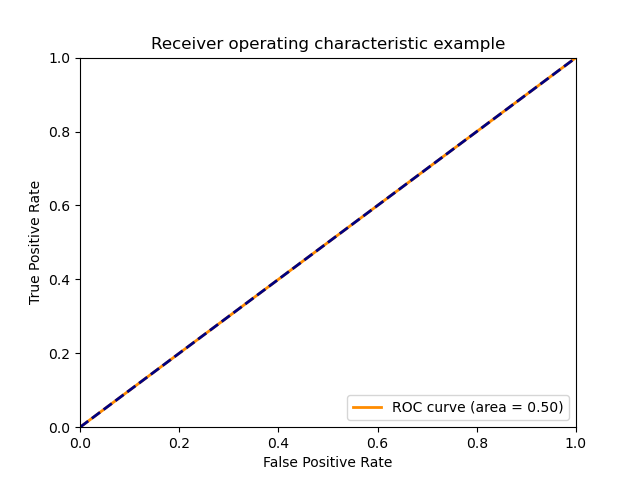

And now when predicted is from optimal threshold of only one node
Measures for GNNModel:
Confusion matrix:
[[632829      0]
 [114753      0]]
F1 score:
0.7761318288849295
Precision:
0.8700630258907212
Recall:
0.8465011196096214
RMSE:
0.3917893316444165
Optimal threshold: 
1.0662942


<IPython.core.display.Javascript object>


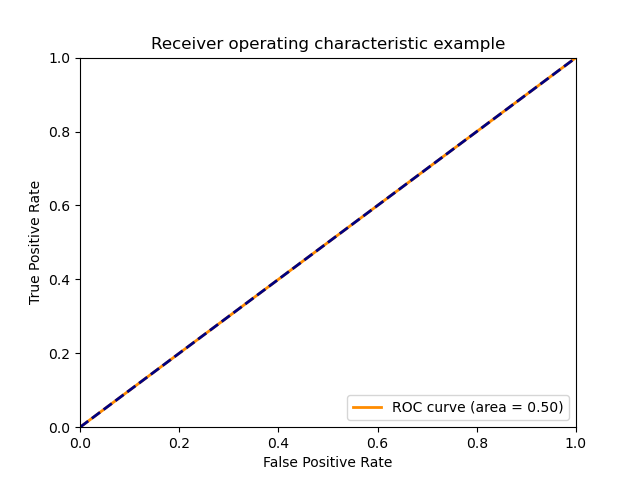

And now when predicted is from optimal threshold of only one node


<IPython.core.display.Javascript object>


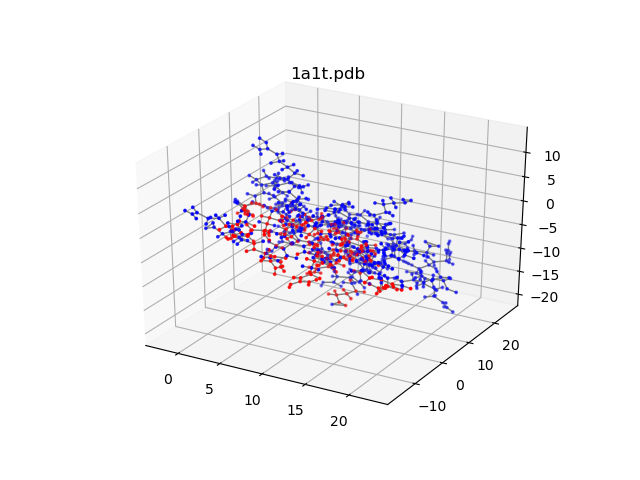

<IPython.core.display.Javascript object>


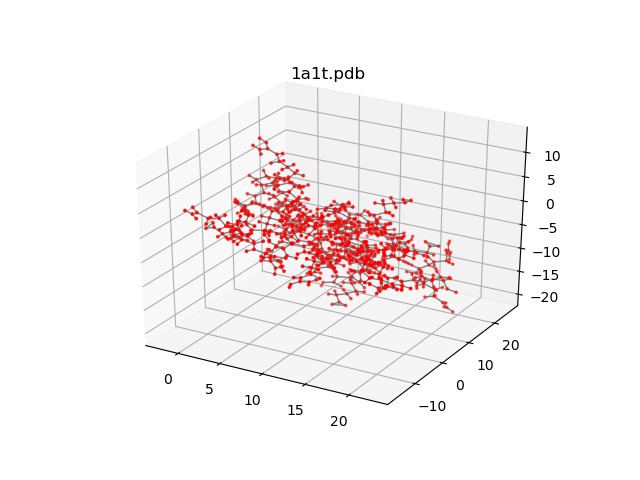

In [3]:
first_gconv = NetFirstGraphConvThenLinear(out_features=32, hidden_conv_sizes=[64, 32, 32], hidden_linear_sizes=[128, 64, 32, 16], dropout_p=0.5)
linear = NetLinear(out_features=32, hidden_linear_sizes=[128, 128, 64, 64, 32])
last_linear = NetLinear(in_features=32+32, out_features=2, hidden_linear_sizes=[128, 64, 32, 16])

net = nn.Sequential(
    InitialDataLayer(word_to_ixs=word_to_ixs),
    ConcatNets([linear, first_gconv]),
    last_linear
)
big_model = GNNModel(net)
#
big_model.train(train_d, loss_weights=[1.0, 8.6], batch_size=30, epochs=30)
#
calculate_metrics(test_d, big_model, big_model.get_name())

#
plot_from_file('1a1t.pdb', lambda atom: LABEL_POSITIVE_COLOR if is_labeled_positive(atom) else LABEL_NEGATIVE_COLOR,
               word_to_ixs, standardize=standardize)
plot_predicted('1a1t.pdb', big_model, word_to_ixs, standardize=standardize)

# 3. model

Sequential(
  (0): ConcatNets(
    (nets): ModuleList(
      (0): Sequential(
        (0): InitialDataLayer(
          (dropout): Dropout(p=0.4, inplace=False)
          (edge_layer): EdgeLayer(
            (linear): Linear(in_features=4, out_features=8, bias=True)
          )
          (node_layer): NodeEmbeddingLayer(
            (col_to_embedding): ModuleDict(
              (2): Embedding(5, 5)
              (3): Embedding(83, 5)
              (4): Embedding(20, 5)
              (44): Embedding(31, 5)
              (45): Embedding(8, 5)
              (5): Embedding(21, 5)
              (6): Embedding(21, 5)
            )
            (linear): Linear(in_features=85, out_features=64, bias=True)
          )
        )
        (1): NetLinear(
          (dropout): Dropout(p=0.4, inplace=False)
          (hidden_linear_layers): ModuleList(
            (0): Linear(in_features=72, out_features=128, bias=True)
            (1): Linear(in_features=128, out_features=64, bias=True)
            (2

Epoch 00002 | Step 00015 | Loss 0.7016 | Acc 0.8431 |
Epoch 00002 | Step 00016 | Loss 0.6750 | Acc 0.9560 |
Epoch 00002 | Step 00017 | Loss 0.6966 | Acc 0.8756 |
Epoch 00002 | Step 00018 | Loss 0.6950 | Acc 0.8811 |
Epoch 00002 | Step 00019 | Loss 0.6897 | Acc 0.9023 |
Epoch 00002 | Step 00020 | Loss 0.6899 | Acc 0.9007 |
Epoch 00002 | Step 00021 | Loss 0.7085 | Acc 0.8101 |
Epoch 00002 | Step 00022 | Loss 0.6812 | Acc 0.9357 |
Epoch 00002 | Step 00023 | Loss 0.7128 | Acc 0.7733 |
Epoch 00002 | Step 00024 | Loss 0.7036 | Acc 0.8042 |
Epoch 00002 | Step 00025 | Loss 0.6973 | Acc 0.8100 |
Epoch 00002 | Step 00026 | Loss 0.6948 | Acc 0.8119 |
Epoch 00002 | Step 00027 | Loss 0.6915 | Acc 0.8356 |
Epoch 00002 | Step 00028 | Loss 0.6829 | Acc 0.8933 |
Epoch 00002 | Step 00029 | Loss 0.6959 | Acc 0.8701 |
Epoch 00002 | Step 00030 | Loss 0.6928 | Acc 0.8849 |
Epoch 00002 | Step 00031 | Loss 0.6958 | Acc 0.8657 |
Epoch 00002 | Step 00032 | Loss 0.7031 | Acc 0.7888 |
Epoch 00002 | Step 00033 | L

Epoch 00006 | Step 00007 | Loss 0.6983 | Acc 0.8595 |
Epoch 00006 | Step 00008 | Loss 0.6987 | Acc 0.8538 |
Epoch 00006 | Step 00009 | Loss 0.6785 | Acc 0.9521 |
Epoch 00006 | Step 00010 | Loss 0.6709 | Acc 0.9622 |
Epoch 00006 | Step 00011 | Loss 0.7064 | Acc 0.8290 |
Epoch 00006 | Step 00012 | Loss 0.6887 | Acc 0.9057 |
Epoch 00006 | Step 00013 | Loss 0.7031 | Acc 0.8408 |
Epoch 00006 | Step 00014 | Loss 0.7062 | Acc 0.8123 |
Epoch 00006 | Step 00015 | Loss 0.7002 | Acc 0.8431 |
Epoch 00006 | Step 00016 | Loss 0.6766 | Acc 0.9593 |
Epoch 00006 | Step 00017 | Loss 0.6957 | Acc 0.8756 |
Epoch 00006 | Step 00018 | Loss 0.6944 | Acc 0.8811 |
Epoch 00006 | Step 00019 | Loss 0.6900 | Acc 0.9023 |
Epoch 00006 | Step 00020 | Loss 0.6903 | Acc 0.9007 |
Epoch 00006 | Step 00021 | Loss 0.7059 | Acc 0.8101 |
Epoch 00006 | Step 00022 | Loss 0.6823 | Acc 0.9367 |
Epoch 00006 | Step 00023 | Loss 0.7098 | Acc 0.7733 |
Epoch 00006 | Step 00024 | Loss 0.7029 | Acc 0.8091 |
Epoch 00006 | Step 00025 | L

Epoch 00010 | Step 00000 | Loss 0.6883 | Acc 0.9163 |
Epoch 00010 | Step 00001 | Loss 0.6868 | Acc 0.9209 |
Epoch 00010 | Step 00002 | Loss 0.6857 | Acc 0.9227 |
Epoch 00010 | Step 00003 | Loss 0.6640 | Acc 0.9825 |
Epoch 00010 | Step 00004 | Loss 0.7145 | Acc 0.7778 |
Epoch 00010 | Step 00005 | Loss 0.6983 | Acc 0.8606 |
Epoch 00010 | Step 00006 | Loss 0.6807 | Acc 0.9349 |
Epoch 00010 | Step 00007 | Loss 0.6988 | Acc 0.8594 |
Epoch 00010 | Step 00008 | Loss 0.6995 | Acc 0.8538 |
Epoch 00010 | Step 00009 | Loss 0.6750 | Acc 0.9520 |
Epoch 00010 | Step 00010 | Loss 0.6663 | Acc 0.9622 |
Epoch 00010 | Step 00011 | Loss 0.7087 | Acc 0.8290 |
Epoch 00010 | Step 00012 | Loss 0.6872 | Acc 0.9056 |
Epoch 00010 | Step 00013 | Loss 0.7043 | Acc 0.8408 |
Epoch 00010 | Step 00014 | Loss 0.7079 | Acc 0.8123 |
Epoch 00010 | Step 00015 | Loss 0.7008 | Acc 0.8429 |
Epoch 00010 | Step 00016 | Loss 0.6727 | Acc 0.9590 |
Epoch 00010 | Step 00017 | Loss 0.6953 | Acc 0.8754 |
Epoch 00010 | Step 00018 | L

Epoch 00013 | Step 00032 | Loss 0.5984 | Acc 0.6677 |
Epoch 00013 | Step 00033 | Loss 0.5964 | Acc 0.6051 |
Epoch 00013 | Step 00034 | Loss 0.6024 | Acc 0.6448 |
Epoch 00013 | Step 00035 | Loss 0.6108 | Acc 0.6099 |
Epoch 00013 | Step 00036 | Loss 0.5925 | Acc 0.6846 |
Epoch 00013 | Step 00037 | Loss 0.6180 | Acc 0.6711 |
Epoch 00013 | Step 00038 | Loss 0.6725 | Acc 0.5678 |
Epoch 00013 | Step 00039 | Loss 0.6494 | Acc 0.7092 |
Epoch 00014 | Step 00000 | Loss 0.5886 | Acc 0.6359 |
Epoch 00014 | Step 00001 | Loss 0.6081 | Acc 0.6831 |
Epoch 00014 | Step 00002 | Loss 0.5874 | Acc 0.6982 |
Epoch 00014 | Step 00003 | Loss 0.5678 | Acc 0.7037 |
Epoch 00014 | Step 00004 | Loss 0.7352 | Acc 0.7663 |
Epoch 00014 | Step 00005 | Loss 0.6084 | Acc 0.6680 |
Epoch 00014 | Step 00006 | Loss 0.5791 | Acc 0.6412 |
Epoch 00014 | Step 00007 | Loss 0.6029 | Acc 0.6814 |
Epoch 00014 | Step 00008 | Loss 0.6175 | Acc 0.6864 |
Epoch 00014 | Step 00009 | Loss 0.5925 | Acc 0.6476 |
Epoch 00014 | Step 00010 | L

Epoch 00017 | Step 00025 | Loss 0.5677 | Acc 0.5881 |
Epoch 00017 | Step 00026 | Loss 0.5675 | Acc 0.5937 |
Epoch 00017 | Step 00027 | Loss 0.5824 | Acc 0.6046 |
Epoch 00017 | Step 00028 | Loss 0.5884 | Acc 0.6298 |
Epoch 00017 | Step 00029 | Loss 0.5801 | Acc 0.6678 |
Epoch 00017 | Step 00030 | Loss 0.5610 | Acc 0.6480 |
Epoch 00017 | Step 00031 | Loss 0.5823 | Acc 0.6506 |
Epoch 00017 | Step 00032 | Loss 0.5672 | Acc 0.6289 |
Epoch 00017 | Step 00033 | Loss 0.5596 | Acc 0.5892 |
Epoch 00017 | Step 00034 | Loss 0.5636 | Acc 0.6311 |
Epoch 00017 | Step 00035 | Loss 0.5706 | Acc 0.5758 |
Epoch 00017 | Step 00036 | Loss 0.5499 | Acc 0.6691 |
Epoch 00017 | Step 00037 | Loss 0.5803 | Acc 0.6479 |
Epoch 00017 | Step 00038 | Loss 0.6474 | Acc 0.5415 |
Epoch 00017 | Step 00039 | Loss 0.6104 | Acc 0.6869 |
Epoch 00018 | Step 00000 | Loss 0.5402 | Acc 0.6287 |
Epoch 00018 | Step 00001 | Loss 0.5605 | Acc 0.6456 |
Epoch 00018 | Step 00002 | Loss 0.5492 | Acc 0.6606 |
Epoch 00018 | Step 00003 | L

<IPython.core.display.Javascript object>


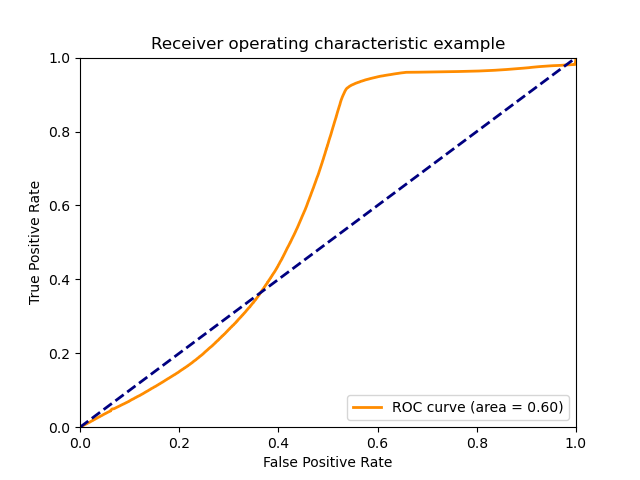

And now when predicted is from optimal threshold of only one node
Measures for GNNModel:
Confusion matrix:
[[319376 375103]
 [  8946 101678]]
F1 score:
0.586270525362722
Precision:
0.8683953312909576
Recall:
0.5229815315555898
RMSE:
0.69066523616323
Optimal threshold: 
-0.8188094


<IPython.core.display.Javascript object>


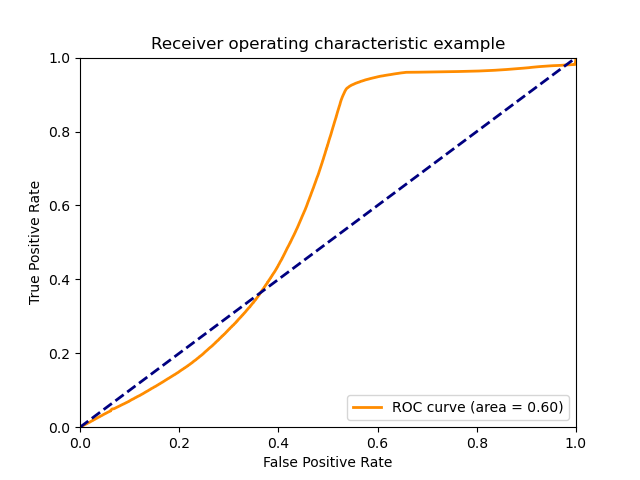

And now when predicted is from optimal threshold of only one node


<IPython.core.display.Javascript object>


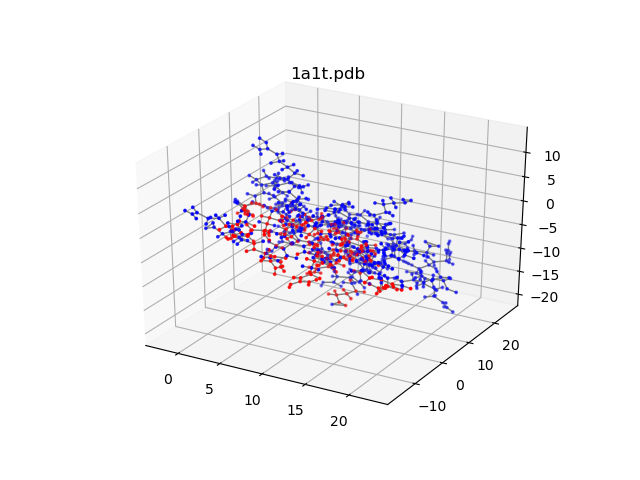

<IPython.core.display.Javascript object>


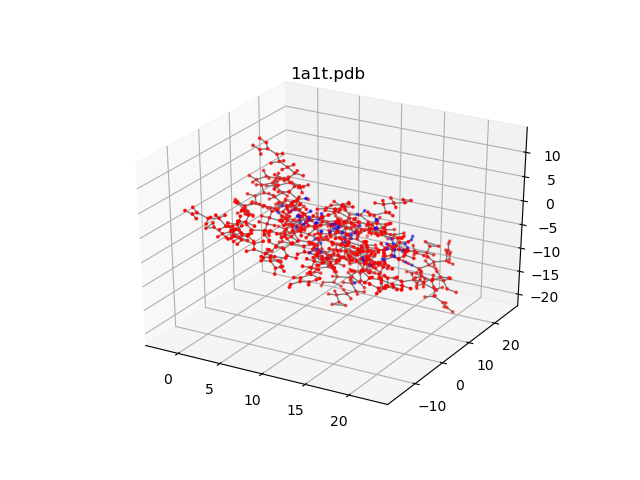

In [6]:
first_gconv = NetFirstGraphConvThenLinear(out_features=32, hidden_conv_sizes=[64], hidden_linear_sizes=[64, 32], dropout_p=0.5)
linear = NetLinear(out_features=32, hidden_linear_sizes=[128, 64, 32])
last_linear = NetLinear(in_features=32+32, out_features=2, hidden_linear_sizes=[64, 32, 16])

net = nn.Sequential(
    ConcatNets([nn.Sequential(InitialDataLayer(word_to_ixs=word_to_ixs), linear), 
                nn.Sequential(InitialDataLayer(word_to_ixs=word_to_ixs), first_gconv)]),
    last_linear
)
big_model = GNNModel(net)
#
big_model.train(train_d, loss_weights=[1.0, 7.6], batch_size=10, epochs=20)
#
calculate_metrics(test_d, big_model, big_model.get_name())

#
plot_from_file('1a1t.pdb', lambda atom: LABEL_POSITIVE_COLOR if is_labeled_positive(atom) else LABEL_NEGATIVE_COLOR,
               word_to_ixs, standardize=standardize)
plot_predicted('1a1t.pdb', big_model, word_to_ixs, standardize=standardize)

# Only one hidden conv

Sequential(
  (0): ConcatNets(
    (nets): ModuleList(
      (0): Sequential(
        (0): InitialDataLayer(
          (dropout): Dropout(p=0.4, inplace=False)
          (edge_layer): EdgeLayer(
            (linear): Linear(in_features=4, out_features=8, bias=True)
          )
          (node_layer): NodeEmbeddingLayer(
            (col_to_embedding): ModuleDict(
              (2): Embedding(5, 5)
              (3): Embedding(83, 5)
              (4): Embedding(20, 5)
              (44): Embedding(31, 5)
              (45): Embedding(8, 5)
              (5): Embedding(21, 5)
              (6): Embedding(21, 5)
            )
            (linear): Linear(in_features=85, out_features=64, bias=True)
          )
        )
        (1): NetLinear(
          (dropout): Dropout(p=0.4, inplace=False)
          (hidden_linear_layers): ModuleList(
            (0): Linear(in_features=72, out_features=128, bias=True)
            (1): Linear(in_features=128, out_features=64, bias=True)
            (2

Epoch 00002 | Step 00011 | Loss 0.7088 | Acc 0.8290 |
Epoch 00002 | Step 00012 | Loss 0.6884 | Acc 0.9057 |
Epoch 00002 | Step 00013 | Loss 0.7047 | Acc 0.8408 |
Epoch 00002 | Step 00014 | Loss 0.7076 | Acc 0.8123 |
Epoch 00002 | Step 00015 | Loss 0.7005 | Acc 0.8431 |
Epoch 00002 | Step 00016 | Loss 0.6773 | Acc 0.9594 |
Epoch 00002 | Step 00017 | Loss 0.6960 | Acc 0.8756 |
Epoch 00002 | Step 00018 | Loss 0.6947 | Acc 0.8811 |
Epoch 00002 | Step 00019 | Loss 0.6899 | Acc 0.9023 |
Epoch 00002 | Step 00020 | Loss 0.6903 | Acc 0.9007 |
Epoch 00002 | Step 00021 | Loss 0.7068 | Acc 0.8101 |
Epoch 00002 | Step 00022 | Loss 0.6824 | Acc 0.9367 |
Epoch 00002 | Step 00023 | Loss 0.7108 | Acc 0.7733 |
Epoch 00002 | Step 00024 | Loss 0.7026 | Acc 0.8094 |
Epoch 00002 | Step 00025 | Loss 0.6968 | Acc 0.8473 |
Epoch 00002 | Step 00026 | Loss 0.6945 | Acc 0.8677 |
Epoch 00002 | Step 00027 | Loss 0.6917 | Acc 0.9043 |
Epoch 00002 | Step 00028 | Loss 0.6839 | Acc 0.9633 |
Epoch 00002 | Step 00029 | L

Epoch 00006 | Step 00004 | Loss 0.7108 | Acc 0.7778 |
Epoch 00006 | Step 00005 | Loss 0.6977 | Acc 0.8607 |
Epoch 00006 | Step 00006 | Loss 0.6833 | Acc 0.9350 |
Epoch 00006 | Step 00007 | Loss 0.6982 | Acc 0.8595 |
Epoch 00006 | Step 00008 | Loss 0.6986 | Acc 0.8538 |
Epoch 00006 | Step 00009 | Loss 0.6789 | Acc 0.9521 |
Epoch 00006 | Step 00010 | Loss 0.6716 | Acc 0.9622 |
Epoch 00006 | Step 00011 | Loss 0.7059 | Acc 0.8290 |
Epoch 00006 | Step 00012 | Loss 0.6888 | Acc 0.9057 |
Epoch 00006 | Step 00013 | Loss 0.7028 | Acc 0.8408 |
Epoch 00006 | Step 00014 | Loss 0.7058 | Acc 0.8123 |
Epoch 00006 | Step 00015 | Loss 0.7001 | Acc 0.8431 |
Epoch 00006 | Step 00016 | Loss 0.6770 | Acc 0.9594 |
Epoch 00006 | Step 00017 | Loss 0.6956 | Acc 0.8756 |
Epoch 00006 | Step 00018 | Loss 0.6944 | Acc 0.8811 |
Epoch 00006 | Step 00019 | Loss 0.6901 | Acc 0.9023 |
Epoch 00006 | Step 00020 | Loss 0.6904 | Acc 0.9007 |
Epoch 00006 | Step 00021 | Loss 0.7056 | Acc 0.8101 |
Epoch 00006 | Step 00022 | L

Epoch 00009 | Step 00036 | Loss 0.6899 | Acc 0.9136 |
Epoch 00009 | Step 00037 | Loss 0.6970 | Acc 0.8482 |
Epoch 00009 | Step 00038 | Loss 0.6856 | Acc 0.9431 |
Epoch 00009 | Step 00039 | Loss 0.7001 | Acc 0.8203 |
Epoch 00010 | Step 00000 | Loss 0.6894 | Acc 0.9163 |
Epoch 00010 | Step 00001 | Loss 0.6883 | Acc 0.9210 |
Epoch 00010 | Step 00002 | Loss 0.6874 | Acc 0.9227 |
Epoch 00010 | Step 00003 | Loss 0.6703 | Acc 0.9825 |
Epoch 00010 | Step 00004 | Loss 0.7097 | Acc 0.7778 |
Epoch 00010 | Step 00005 | Loss 0.6975 | Acc 0.8607 |
Epoch 00010 | Step 00006 | Loss 0.6834 | Acc 0.9350 |
Epoch 00010 | Step 00007 | Loss 0.6980 | Acc 0.8595 |
Epoch 00010 | Step 00008 | Loss 0.6984 | Acc 0.8538 |
Epoch 00010 | Step 00009 | Loss 0.6790 | Acc 0.9521 |
Epoch 00010 | Step 00010 | Loss 0.6727 | Acc 0.9622 |
Epoch 00010 | Step 00011 | Loss 0.7047 | Acc 0.8290 |
Epoch 00010 | Step 00012 | Loss 0.6891 | Acc 0.9057 |
Epoch 00010 | Step 00013 | Loss 0.7021 | Acc 0.8408 |
Epoch 00010 | Step 00014 | L

Epoch 00013 | Step 00028 | Loss 0.6794 | Acc 0.9633 |
Epoch 00013 | Step 00029 | Loss 0.6956 | Acc 0.8711 |
Epoch 00013 | Step 00030 | Loss 0.6927 | Acc 0.8898 |
Epoch 00013 | Step 00031 | Loss 0.6957 | Acc 0.8700 |
Epoch 00013 | Step 00032 | Loss 0.7032 | Acc 0.7970 |
Epoch 00013 | Step 00033 | Loss 0.6963 | Acc 0.8582 |
Epoch 00013 | Step 00034 | Loss 0.6954 | Acc 0.8652 |
Epoch 00013 | Step 00035 | Loss 0.6915 | Acc 0.8999 |
Epoch 00013 | Step 00036 | Loss 0.6896 | Acc 0.9136 |
Epoch 00013 | Step 00037 | Loss 0.6972 | Acc 0.8482 |
Epoch 00013 | Step 00038 | Loss 0.6850 | Acc 0.9431 |
Epoch 00013 | Step 00039 | Loss 0.7003 | Acc 0.8203 |
Epoch 00014 | Step 00000 | Loss 0.6891 | Acc 0.9163 |
Epoch 00014 | Step 00001 | Loss 0.6881 | Acc 0.9210 |
Epoch 00014 | Step 00002 | Loss 0.6873 | Acc 0.9227 |
Epoch 00014 | Step 00003 | Loss 0.6702 | Acc 0.9825 |
Epoch 00014 | Step 00004 | Loss 0.7090 | Acc 0.7778 |
Epoch 00014 | Step 00005 | Loss 0.6974 | Acc 0.8607 |
Epoch 00014 | Step 00006 | L

Epoch 00017 | Step 00021 | Loss 0.7046 | Acc 0.8101 |
Epoch 00017 | Step 00022 | Loss 0.6827 | Acc 0.9367 |
Epoch 00017 | Step 00023 | Loss 0.7082 | Acc 0.7733 |
Epoch 00017 | Step 00024 | Loss 0.7029 | Acc 0.8094 |
Epoch 00017 | Step 00025 | Loss 0.6981 | Acc 0.8473 |
Epoch 00017 | Step 00026 | Loss 0.6954 | Acc 0.8677 |
Epoch 00017 | Step 00027 | Loss 0.6907 | Acc 0.9043 |
Epoch 00017 | Step 00028 | Loss 0.6789 | Acc 0.9633 |
Epoch 00017 | Step 00029 | Loss 0.6956 | Acc 0.8711 |
Epoch 00017 | Step 00030 | Loss 0.6927 | Acc 0.8898 |
Epoch 00017 | Step 00031 | Loss 0.6957 | Acc 0.8700 |
Epoch 00017 | Step 00032 | Loss 0.7033 | Acc 0.7970 |
Epoch 00017 | Step 00033 | Loss 0.6965 | Acc 0.8582 |
Epoch 00017 | Step 00034 | Loss 0.6955 | Acc 0.8652 |
Epoch 00017 | Step 00035 | Loss 0.6915 | Acc 0.8999 |
Epoch 00017 | Step 00036 | Loss 0.6895 | Acc 0.9136 |
Epoch 00017 | Step 00037 | Loss 0.6974 | Acc 0.8482 |
Epoch 00017 | Step 00038 | Loss 0.6847 | Acc 0.9431 |
Epoch 00017 | Step 00039 | L

<IPython.core.display.Javascript object>


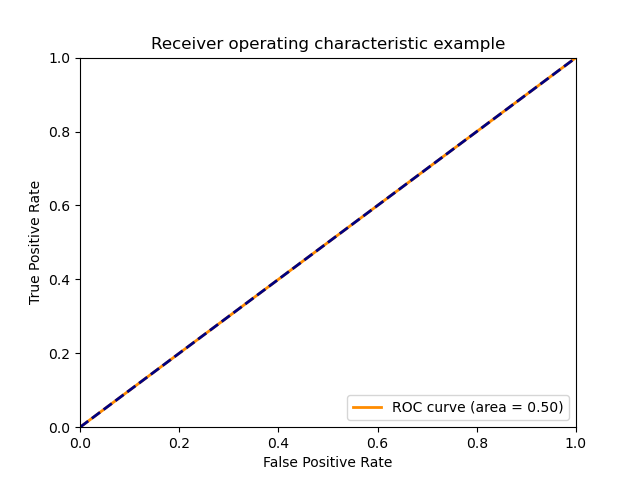

And now when predicted is from optimal threshold of only one node
Measures for GNNModel:
Confusion matrix:
[[694479      0]
 [110624      0]]
F1 score:
0.7989628161684966
Precision:
0.881476194844378
Recall:
0.8625964628128326
RMSE:
0.3706798311038346
Optimal threshold: 
0.9707086


<IPython.core.display.Javascript object>


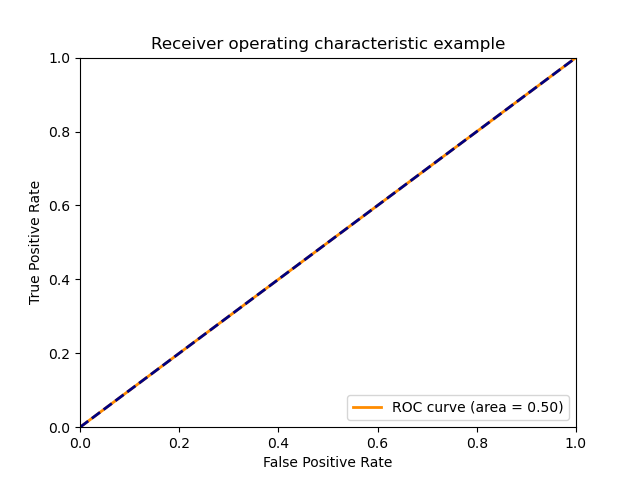

And now when predicted is from optimal threshold of only one node


<IPython.core.display.Javascript object>


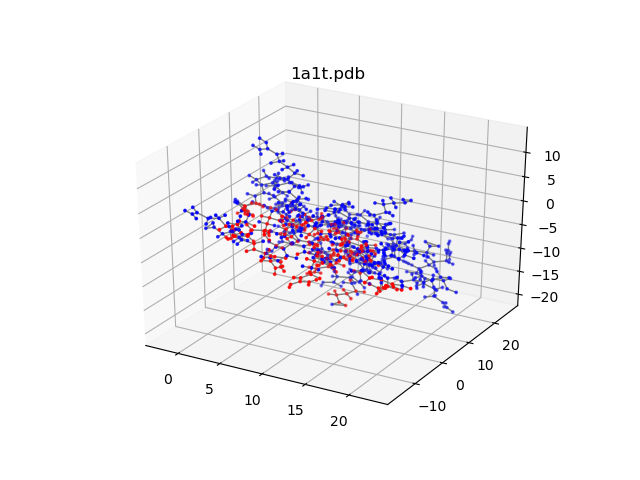

<IPython.core.display.Javascript object>


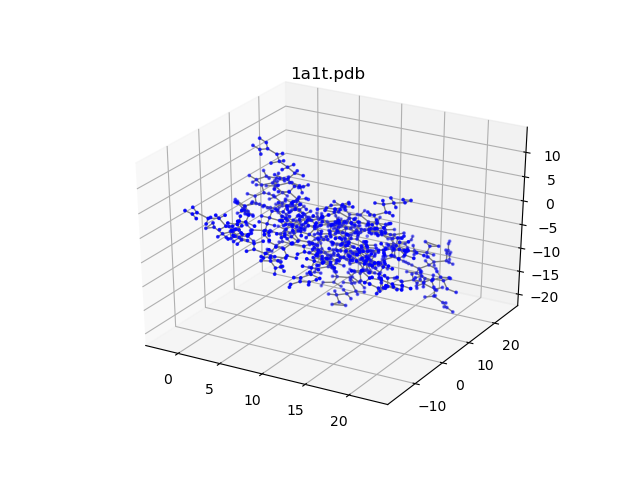

In [5]:
first_gconv = NetFirstGraphConvThenLinear(out_features=32, hidden_conv_sizes=[64, 64, 32], hidden_linear_sizes=[64, 32], dropout_p=0.5)
linear = NetLinear(out_features=32, hidden_linear_sizes=[128, 64, 32])
last_linear = NetLinear(in_features=32+32, out_features=2, hidden_linear_sizes=[64, 32, 16])

net = nn.Sequential(
    ConcatNets([nn.Sequential(InitialDataLayer(word_to_ixs=word_to_ixs), linear), 
                nn.Sequential(InitialDataLayer(word_to_ixs=word_to_ixs), first_gconv)]),
    last_linear
)
big_model = GNNModel(net)
#
big_model.train(train_d, loss_weights=[1.0, 7.6], batch_size=10, epochs=20)
#
calculate_metrics(test_d, big_model, big_model.get_name())

#
plot_from_file('1a1t.pdb', lambda atom: LABEL_POSITIVE_COLOR if is_labeled_positive(atom) else LABEL_NEGATIVE_COLOR,
               word_to_ixs, standardize=standardize)
plot_predicted('1a1t.pdb', big_model, word_to_ixs, standardize=standardize)